# Parcial 1 - Ciencia de Datos Aplicada

Andrés Borda 
201729184

### Librerias

In [77]:
# Importar bibliotecas

import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import networkx as nx

from IPython.display import Image, display

import statsmodels.api as sm
from statsmodels.formula.api import ols

### Importar datos

In [78]:
# Cargar los datos del json
df_demograficos = pd.read_excel('./data/Demograficos.xlsx')
df_historicoNotas = pd.read_excel('./data/HistoricoNotas.xlsx')


## 1. Reporte de calidad y preparacion de datos

### Caracteristicas de los dataframes

In [79]:
#Vista previa de los datos

print("Items DataFrame")
display(df_demograficos.head())  

print("Search Results DataFrame")
display(df_historicoNotas.head())  


Items DataFrame


,PERIODO_ACAENICO,CODIGO,UNIDAD,CODIGOPROGRAMA,PROGRAMA,SEMESTRE,PROMEDIOSEMESTRE,GENERO,FECHANACIMIENTO,ESTRATO,...,IDDEPARTAMENTONACIMIENTO,DEPARTAMENTONACIMIENTO,SISBEN,NIVELSISBEN,CANTIDAD,PERIODO,EDAD2,EDAD,FACULTAD,NIVEL_FORMACION
0,2017 - 2,53212132001,ESCUELA NACIONAL DEL DEPORTE,53212,DEPORTE,8,4.4,Masculino,02-04-1996,3.0,...,76.0,VALLE DEL CAUCA,0.0,NaN,1,2017-II,21,Edad entre 18 y 25 años,Fac. Deporte,Universitrario
1,2017 - 2,7306132001,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,8,3.3,Femenino,01-08-1990,2.0,...,76.0,VALLE DEL CAUCA,0.0,NaN,1,2017-II,27,Edad entre 26 y 33 años,Fac. Salud,Universitrario
2,2017 - 2,7306131002,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,10,4.5,Femenino,14-08-1994,2.0,...,76.0,VALLE DEL CAUCA,0.0,NaN,1,2017-II,23,Edad entre 18 y 25 años,Fac. Salud,Universitrario
3,2017 - 2,53212162577,ESCUELA NACIONAL DEL DEPORTE,53212,DEPORTE,3,3.4,Masculino,15-07-1997,3.0,...,76.0,VALLE DEL CAUCA,0.0,NaN,1,2017-II,20,Edad entre 18 y 25 años,Fac. Deporte,Universitrario
4,2017 - 2,53212171151,ESCUELA NACIONAL DEL DEPORTE,53212,DEPORTE,2,3.6,Masculino,24-03-1999,3.0,...,76.0,VALLE DEL CAUCA,0.0,NaN,1,2017-II,18,Edad entre 18 y 25 años,Fac. Deporte,Universitrario


Search Results DataFrame


,CODIGO,CURSO,Nota_Definitiva,Aprobado,Creditos,Periodo,Semestre,Cuenta para Promedio,TIPO,CODIGOMATRICULA,PENSUM,PROGRAMA
0,9010602,E.C I (NEGOCIACIÓN Y MANEJO DE CONFLICTOS),A,SI,2,2018-2,1,NO,NORMAL,90555141017,ADM 20112 PENSUM A,ADMINISTRACION DE EMPRESAS
1,90106,ELECTIVA COMPLEMENTARIA I,5.0 - CINCO. CERO,SI,2,2018-2,1,NO,NORMAL,90555141017,ADM 20112 PENSUM A,ADMINISTRACION DE EMPRESAS
2,9020601,E.C. II (LIDERAZGO Y TOMA DE DECISIONES),A,SI,2,2019-1,2,NO,NORMAL,90555122002,ADM 20112 PENSUM A,ADMINISTRACION DE EMPRESAS
3,9020601,E.C. II (LIDERAZGO Y TOMA DE DECISIONES),A,SI,2,2020-1,2,NO,NORMAL,90555151012,ADM 20112 PENSUM A,ADMINISTRACION DE EMPRESAS
4,9020601,E.C. II (LIDERAZGO Y TOMA DE DECISIONES),A,SI,2,2020-1,2,NO,VALIDACIÓN,90555151024,ADM 20112 PENSUM A,ADMINISTRACION DE EMPRESAS


In [80]:
# Revisar el tamaño de los dataframes
print("Shape of df_items:", df_demograficos.shape)
print("Shape of df_search:", df_historicoNotas.shape)

Shape of df_items: (55419, 33)
Shape of df_search: (418031, 12)


In [81]:
# Revisar las columnas de los dataframes y el tipo de datos
print("Data types in demograficos:")
print(df_demograficos.dtypes)

print("\nData types in historico notas:")
print(df_historicoNotas.dtypes)


Data types in demograficos:
PERIODO_ACAENICO             object
CODIGO                       object
UNIDAD                       object
CODIGOPROGRAMA                int64
PROGRAMA                     object
SEMESTRE                      int64
PROMEDIOSEMESTRE            float64
GENERO                       object
FECHANACIMIENTO              object
ESTRATO                     float64
CIUDADRESIDENCIA             object
DEPARTAMENTORESICEDENCIA     object
ESTADOCIVIL                  object
PROMEDIOGENERAL             float64
SITUACION_ACTUAL             object
CATEGORIA_ACTUAL             object
SITUACION_DEL_PERIODO        object
CATEGORIA_DEL_PERIODO        object
DISCAPACIDAD                 object
TIPO_DISCAPACIDAD            object
FECHA_MATRICULA              object
IDCIUDADNACIMIENTO          float64
CIUDADNACIMIENTO             object
IDDEPARTAMENTONACIMIENTO    float64
DEPARTAMENTONACIMIENTO       object
SISBEN                      float64
NIVELSISBEN                 float64


Unificar los data frames para poder operar todo en una sola tabla en base a los ids.

In [82]:
df_final = pd.merge(df_demograficos, df_historicoNotas, 
                     left_on='CODIGO', right_on='CODIGOMATRICULA', 
                     how='inner', suffixes=('', '_HN'))

df_final.head()

,PERIODO_ACAENICO,CODIGO,UNIDAD,CODIGOPROGRAMA,PROGRAMA,SEMESTRE,PROMEDIOSEMESTRE,GENERO,FECHANACIMIENTO,ESTRATO,...,Nota_Definitiva,Aprobado,Creditos,Periodo,Semestre,Cuenta para Promedio,TIPO,CODIGOMATRICULA,PENSUM,PROGRAMA_HN
0,2017 - 2,7306131002,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,10,4.5,Femenino,14-08-1994,2.0,...,4.6,SI,5,2017-1,9,SI,NORMAL,7306131002,FIS 2012-1 PENSUM 5,FISIOTERAPIA
1,2017 - 2,7306131002,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,10,4.5,Femenino,14-08-1994,2.0,...,4.8,SI,3,2017-1,9,SI,NORMAL,7306131002,FIS 2012-1 PENSUM 5,FISIOTERAPIA
2,2017 - 2,7306131002,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,10,4.5,Femenino,14-08-1994,2.0,...,4.5,SI,3,2017-1,9,NO,NORMAL,7306131002,FIS 2012-1 PENSUM 5,FISIOTERAPIA
3,2017 - 2,7306131002,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,10,4.5,Femenino,14-08-1994,2.0,...,4.0 - CUATRO. CERO,SI,5,2017-1,9,SI,NORMAL,7306131002,FIS 2012-1 PENSUM 5,FISIOTERAPIA
4,2017 - 2,7306131002,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,10,4.5,Femenino,14-08-1994,2.0,...,4.6,SI,12,2017-2,10,SI,NORMAL,7306131002,FIS 2012-1 PENSUM 5,FISIOTERAPIA


### Calidad de datos

Revisamos si hay registros duplicados

In [83]:
duplicates = df_final.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


Datos faltantes

In [84]:
# Buscar valores faltantes
missing_values = df_final.isnull().sum()
display(missing_values[missing_values > 0])


FECHANACIMIENTO                 38
ESTRATO                        160
CIUDADRESIDENCIA               896
DEPARTAMENTORESICEDENCIA       896
ESTADOCIVIL                    145
DISCAPACIDAD                   266
IDCIUDADNACIMIENTO             712
CIUDADNACIMIENTO               712
IDDEPARTAMENTONACIMIENTO       712
DEPARTAMENTONACIMIENTO         712
SISBEN                          84
NIVELSISBEN                 141184
Cuenta para Promedio             8
TIPO                             3
dtype: int64

In [85]:
# creacion de la variable de interes

df_demograficos['desercion'] = df_demograficos['SITUACION_ACTUAL'].apply(lambda x: 1 if x in ['EXCLUIDO NO RENOVACION DE MATRICULA', 'RETIRO DEFINITIVO'] else 0)

df_demograficos.head()

,PERIODO_ACAENICO,CODIGO,UNIDAD,CODIGOPROGRAMA,PROGRAMA,SEMESTRE,PROMEDIOSEMESTRE,GENERO,FECHANACIMIENTO,ESTRATO,...,DEPARTAMENTONACIMIENTO,SISBEN,NIVELSISBEN,CANTIDAD,PERIODO,EDAD2,EDAD,FACULTAD,NIVEL_FORMACION,desercion
0,2017 - 2,53212132001,ESCUELA NACIONAL DEL DEPORTE,53212,DEPORTE,8,4.4,Masculino,02-04-1996,3.0,...,VALLE DEL CAUCA,0.0,NaN,1,2017-II,21,Edad entre 18 y 25 años,Fac. Deporte,Universitrario,1
1,2017 - 2,7306132001,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,8,3.3,Femenino,01-08-1990,2.0,...,VALLE DEL CAUCA,0.0,NaN,1,2017-II,27,Edad entre 26 y 33 años,Fac. Salud,Universitrario,1
2,2017 - 2,7306131002,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,10,4.5,Femenino,14-08-1994,2.0,...,VALLE DEL CAUCA,0.0,NaN,1,2017-II,23,Edad entre 18 y 25 años,Fac. Salud,Universitrario,1
3,2017 - 2,53212162577,ESCUELA NACIONAL DEL DEPORTE,53212,DEPORTE,3,3.4,Masculino,15-07-1997,3.0,...,VALLE DEL CAUCA,0.0,NaN,1,2017-II,20,Edad entre 18 y 25 años,Fac. Deporte,Universitrario,1
4,2017 - 2,53212171151,ESCUELA NACIONAL DEL DEPORTE,53212,DEPORTE,2,3.6,Masculino,24-03-1999,3.0,...,VALLE DEL CAUCA,0.0,NaN,1,2017-II,18,Edad entre 18 y 25 años,Fac. Deporte,Universitrario,0


In [58]:
df_final['PROGRAMA'].value_counts()

PROGRAMA
TECNOLOGIA EN DEPORTE                                                  130449
ESPECIALIZACION EN DIRECCION Y GESTION DEPORTIVA                        15137
TECNOLOGÍA EN GESTIÓN DEPORTIVA                                          9221
ESPECIALIZACION EN TEORIA Y METODOLOGIA DEL ENTRENAMIENTO DEPORTIVO      7344
ESPECIALIZACIÓN EN ACTIVIDAD FÍSICA                                      5227
ESPECIALIZACIÓN EN FISIOTERAPIA DEL DEPORTE                              3432
ESPECIALIZACIÓN EN PERIODISMO DEPORTIVO                                  1585
ESPECIALIZACIÓN EN MERCADEO DEPORTIVO                                    1584
ESPECIALIZACIÓN EN NEUROREHABILITACIÓN                                   1362
FISIOTERAPIA                                                              109
ADMINISTRACION DE EMPRESAS                                                 81
DEPORTE                                                                    61
Name: count, dtype: int64

In [53]:
df_extracted = df_demograficos[['desercion', 'PROGRAMA', 'SEMESTRE', 'PROMEDIOSEMESTRE', 'GENERO', 
                          'ESTRATO', 'DEPARTAMENTORESICEDENCIA', 'PROMEDIOGENERAL', 'DISCAPACIDAD', 
                          'DEPARTAMENTONACIMIENTO', 'EDAD2', 'NIVEL_FORMACION']]

df_extracted.head()

,desercion,PROGRAMA,SEMESTRE,PROMEDIOSEMESTRE,GENERO,ESTRATO,DEPARTAMENTORESICEDENCIA,PROMEDIOGENERAL,DISCAPACIDAD,DEPARTAMENTONACIMIENTO,EDAD2,NIVEL_FORMACION
0,1,FISIOTERAPIA,10,4.5,Femenino,2.0,VALLE DEL CAUCA,4.0,NINGUNA,VALLE DEL CAUCA,23,Universitrario
1,1,FISIOTERAPIA,10,4.5,Femenino,2.0,VALLE DEL CAUCA,4.0,NINGUNA,VALLE DEL CAUCA,23,Universitrario
2,1,FISIOTERAPIA,10,4.5,Femenino,2.0,VALLE DEL CAUCA,4.0,NINGUNA,VALLE DEL CAUCA,23,Universitrario
3,1,FISIOTERAPIA,10,4.5,Femenino,2.0,VALLE DEL CAUCA,4.0,NINGUNA,VALLE DEL CAUCA,23,Universitrario
4,1,FISIOTERAPIA,10,4.5,Femenino,2.0,VALLE DEL CAUCA,4.0,NINGUNA,VALLE DEL CAUCA,23,Universitrario


In [54]:
df_extracted['TIENE_DISCAPACIDAD'] = df_extracted['DISCAPACIDAD'].apply(lambda x: 0 if x == 'NINGUNA' else 1)

df_extracted[['DISCAPACIDAD', 'TIENE_DISCAPACIDAD']].head()

C:\Users\andre\AppData\Local\Temp\ipykernel_28836\919208530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extracted['TIENE_DISCAPACIDAD'] = df_extracted['DISCAPACIDAD'].apply(lambda x: 0 if x == 'NINGUNA' else 1)


,DISCAPACIDAD,TIENE_DISCAPACIDAD
0,NINGUNA,0
1,NINGUNA,0
2,NINGUNA,0
3,NINGUNA,0
4,NINGUNA,0


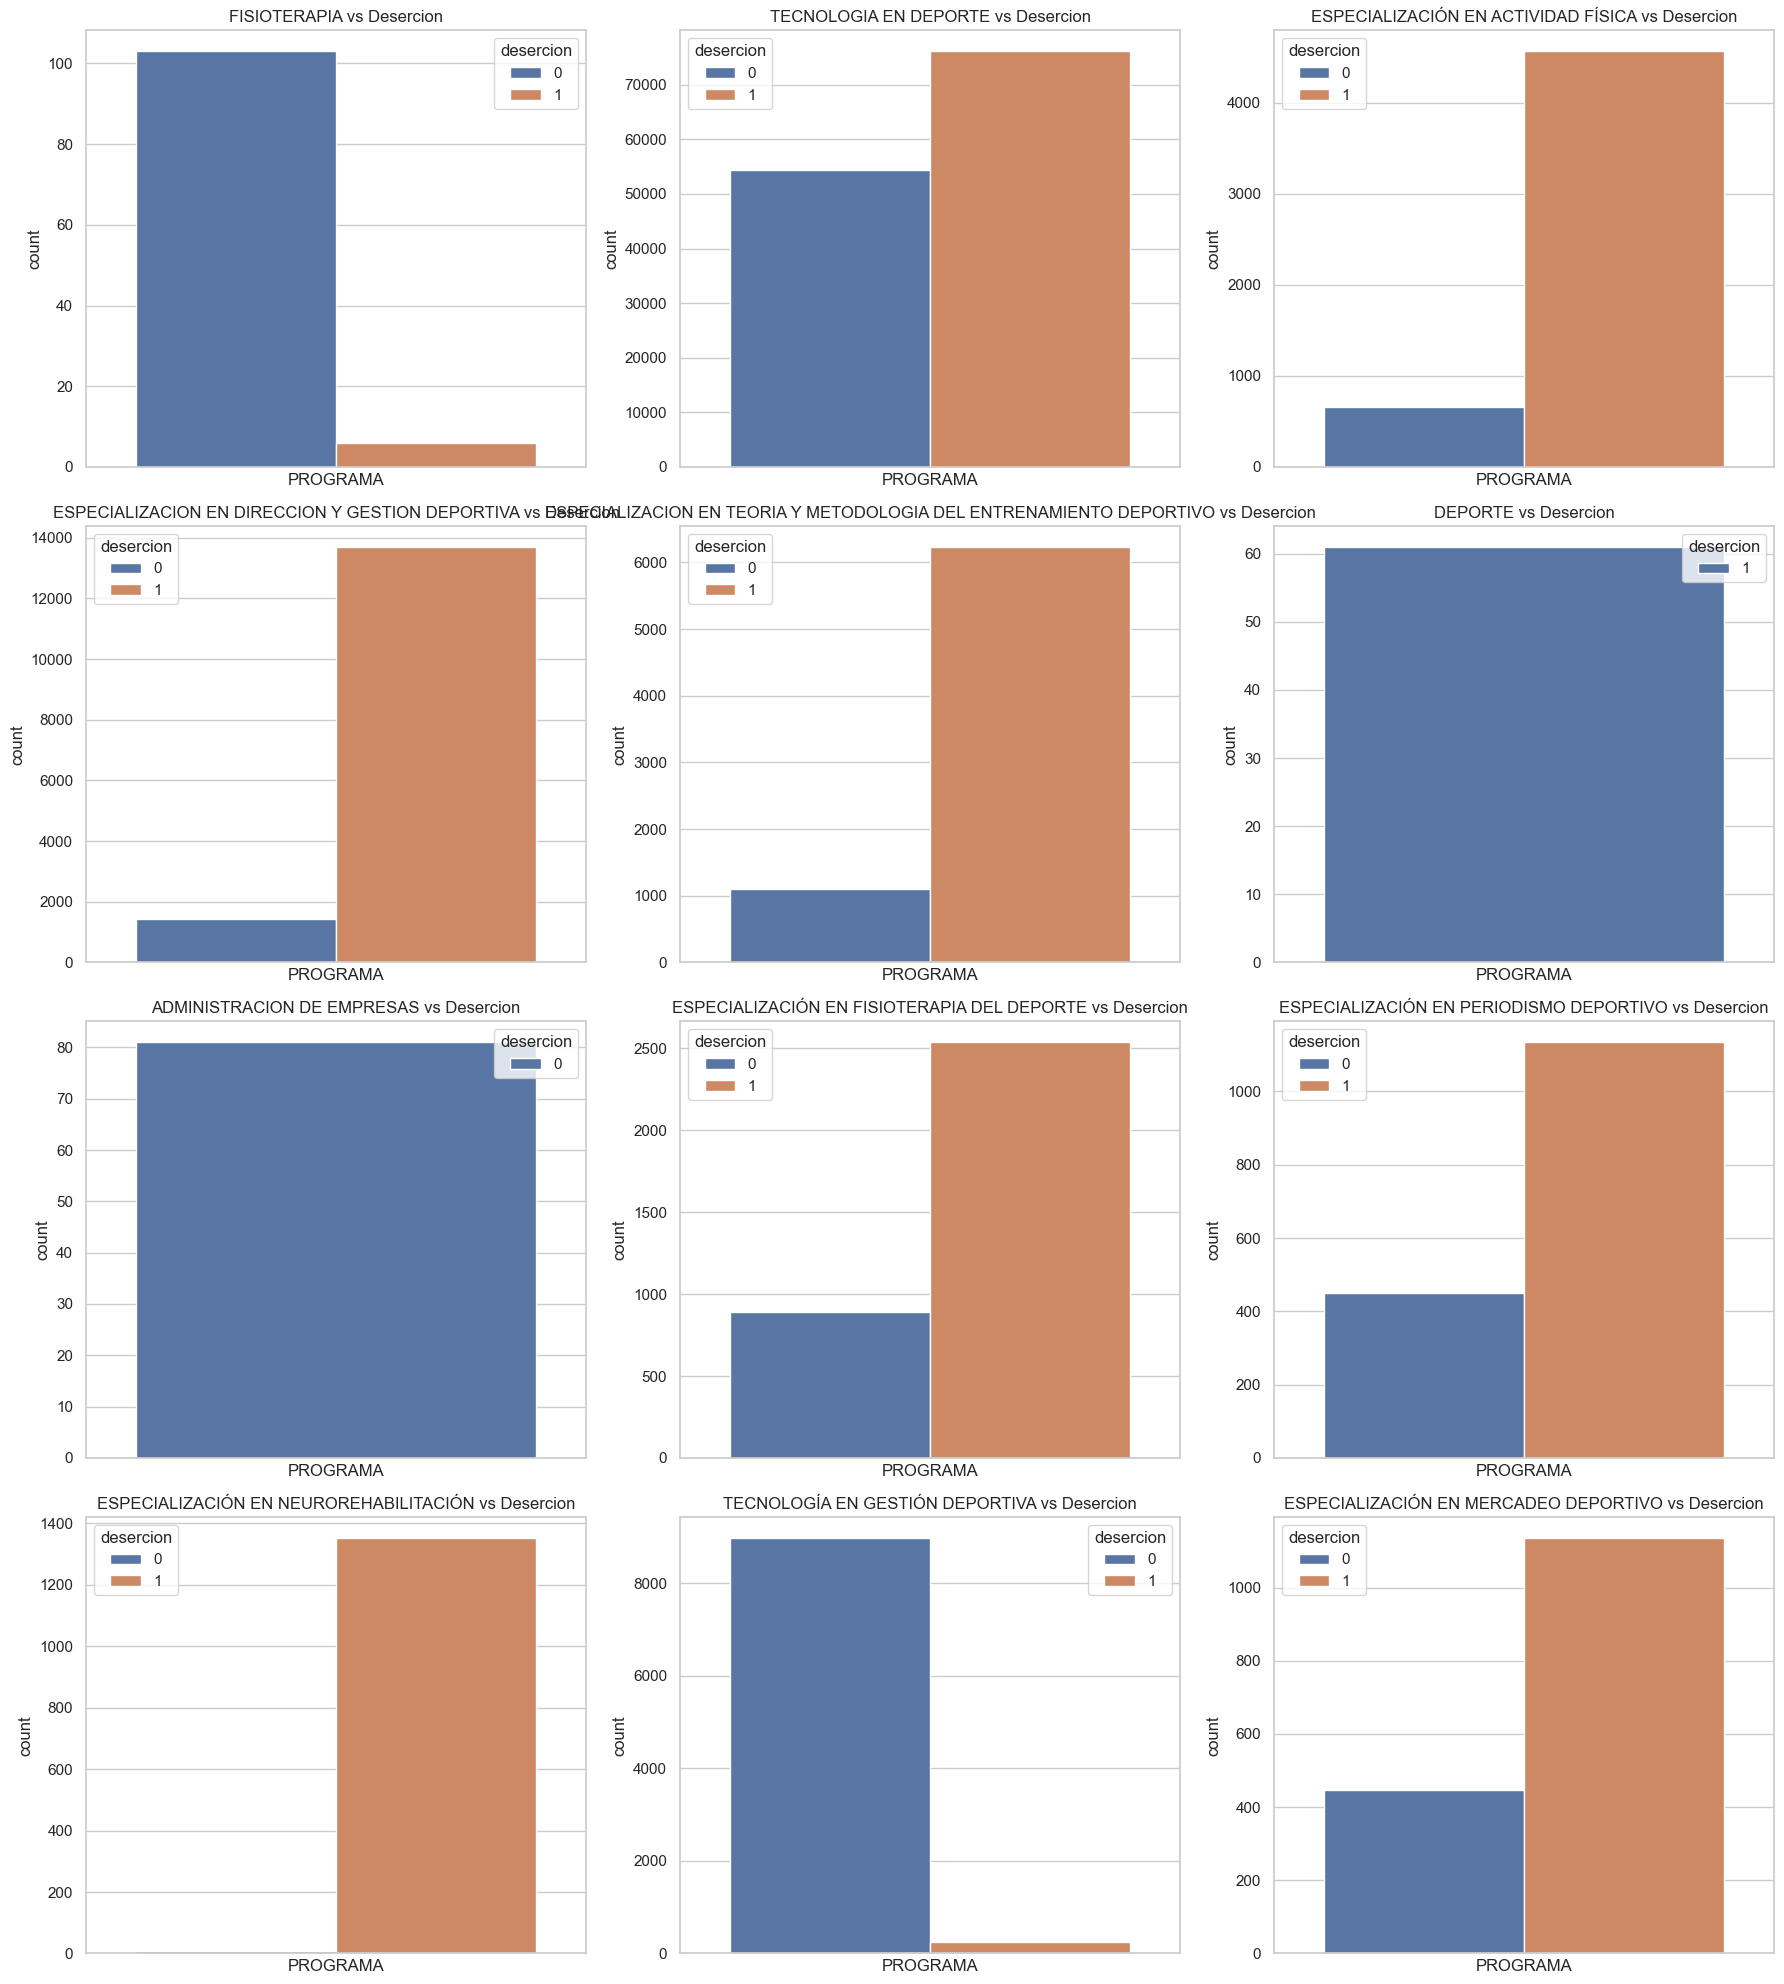

In [65]:
sns.set(style="whitegrid")

unique_programs = df_extracted['PROGRAMA'].unique()

num_columns = 3
num_rows = (len(unique_programs) + num_columns - 1) // num_columns  # Ceiling division

plt.figure(figsize=(18, 5 * num_rows))

for i, program in enumerate(unique_programs):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.countplot(x='PROGRAMA', hue='desercion', data=df_extracted[df_extracted['PROGRAMA'] == program])
    plt.title(f'{program} vs Desercion')
    plt.xticks([])
    plt.tight_layout()

plt.show()

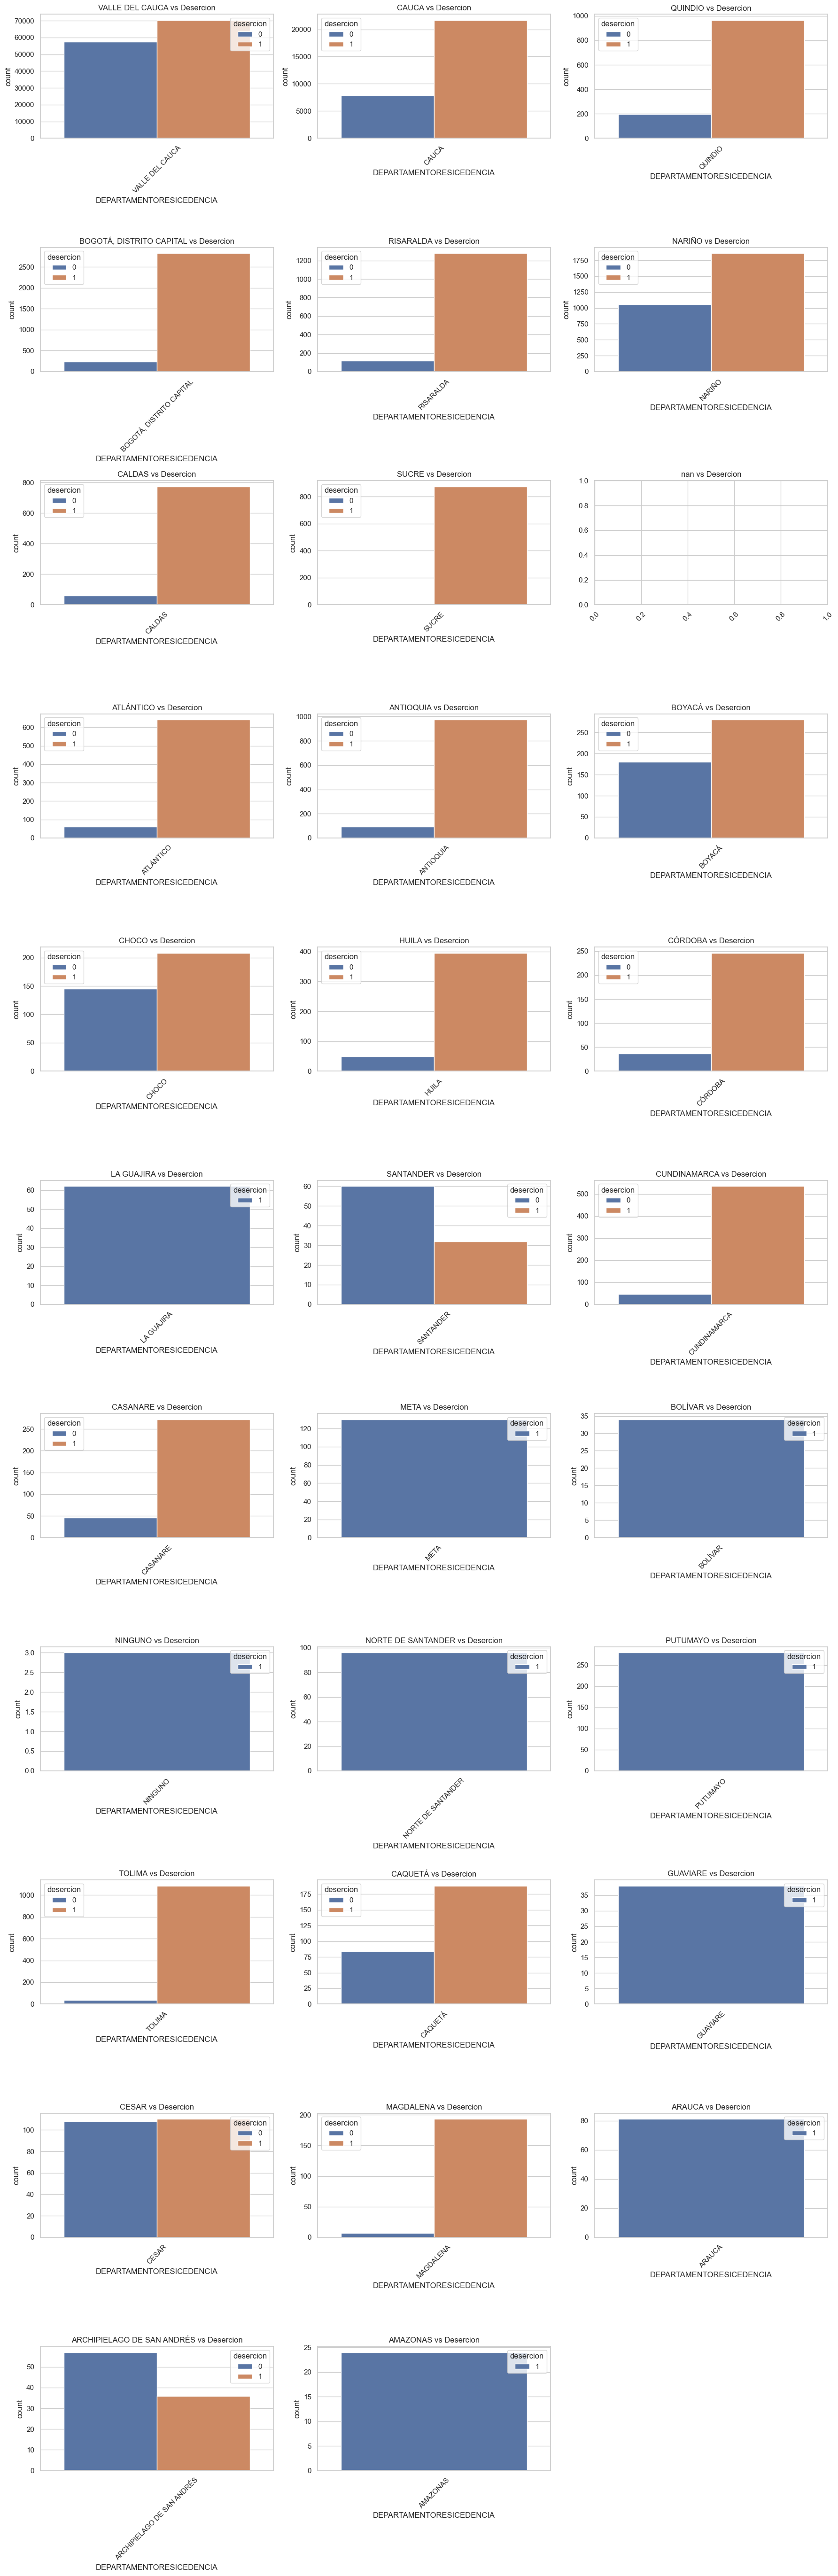

In [63]:
sns.set(style="whitegrid")

unique_departments = df_extracted['DEPARTAMENTORESICEDENCIA'].unique()

num_columns = 3
num_rows = (len(unique_departments) + num_columns - 1) // num_columns 

plt.figure(figsize=(18, 5 * num_rows))

for i, department in enumerate(unique_departments):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.countplot(x='DEPARTAMENTORESICEDENCIA', hue='desercion', data=df_extracted[df_extracted['DEPARTAMENTORESICEDENCIA'] == department])
    plt.title(f'{department} vs Desercion')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

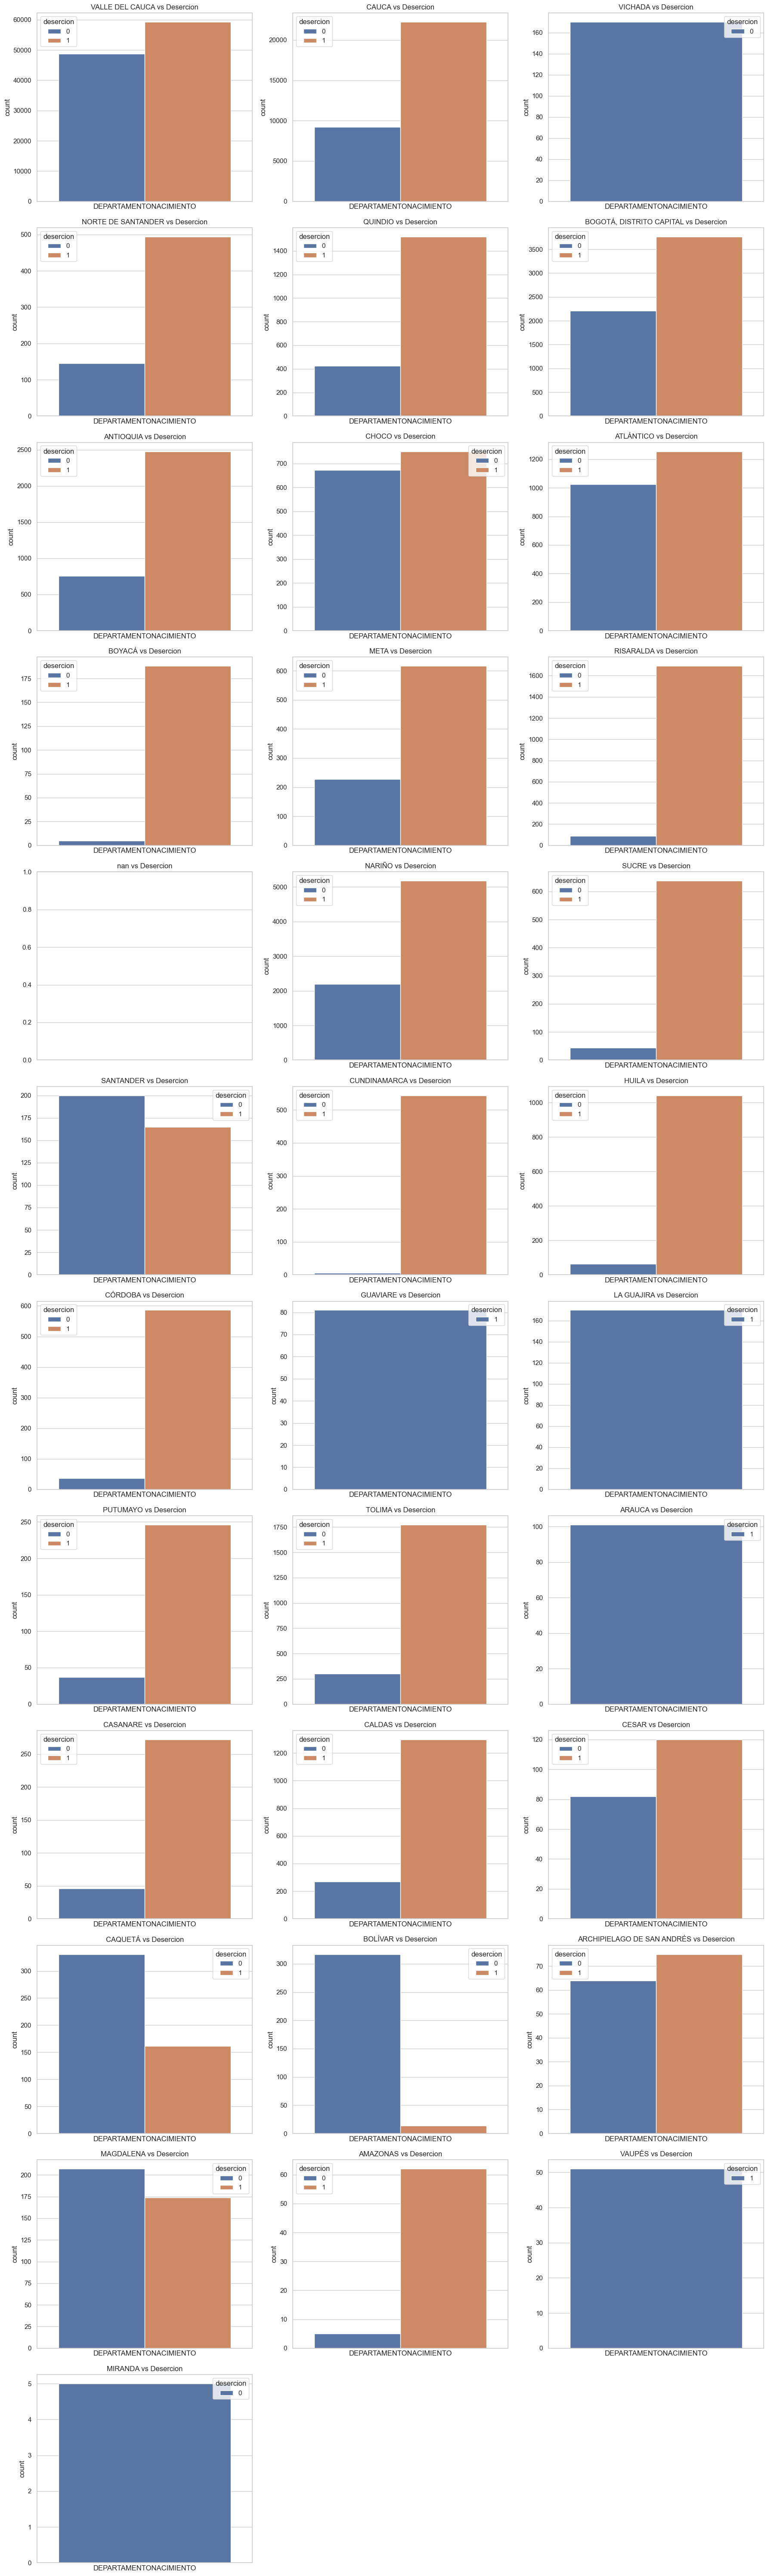

In [68]:
sns.set(style="whitegrid")

unique_departments_nacimiento = df_extracted['DEPARTAMENTONACIMIENTO'].unique()

num_columns = 3
num_rows = (len(unique_departments_nacimiento) + num_columns - 1) // num_columns  # Ceiling division

plt.figure(figsize=(18, 5 * num_rows))

for i, department in enumerate(unique_departments_nacimiento):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.countplot(x='DEPARTAMENTONACIMIENTO', hue='desercion', data=df_extracted[df_extracted['DEPARTAMENTONACIMIENTO'] == department])
    plt.title(f'{department} vs Desercion')
    plt.xticks([])
    plt.tight_layout()

plt.show()

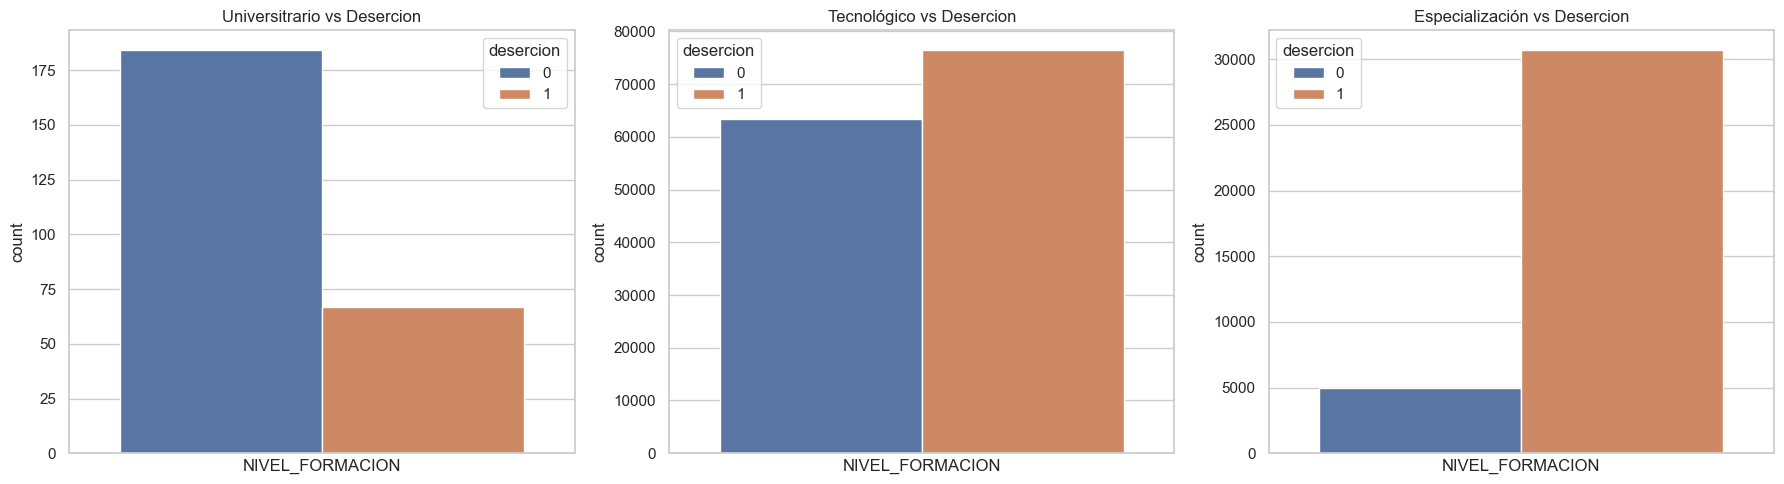

In [70]:
sns.set(style="whitegrid")

unique_nivel_formacion = df_extracted['NIVEL_FORMACION'].unique()

num_columns = 3
num_rows = (len(unique_nivel_formacion) + num_columns - 1) // num_columns 

plt.figure(figsize=(18, 5 * num_rows))

for i, nivel in enumerate(unique_nivel_formacion):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.countplot(x='NIVEL_FORMACION', hue='desercion', data=df_extracted[df_extracted['NIVEL_FORMACION'] == nivel])
    plt.title(f'{nivel} vs Desercion')
    plt.xticks([])
    plt.tight_layout()

plt.show()

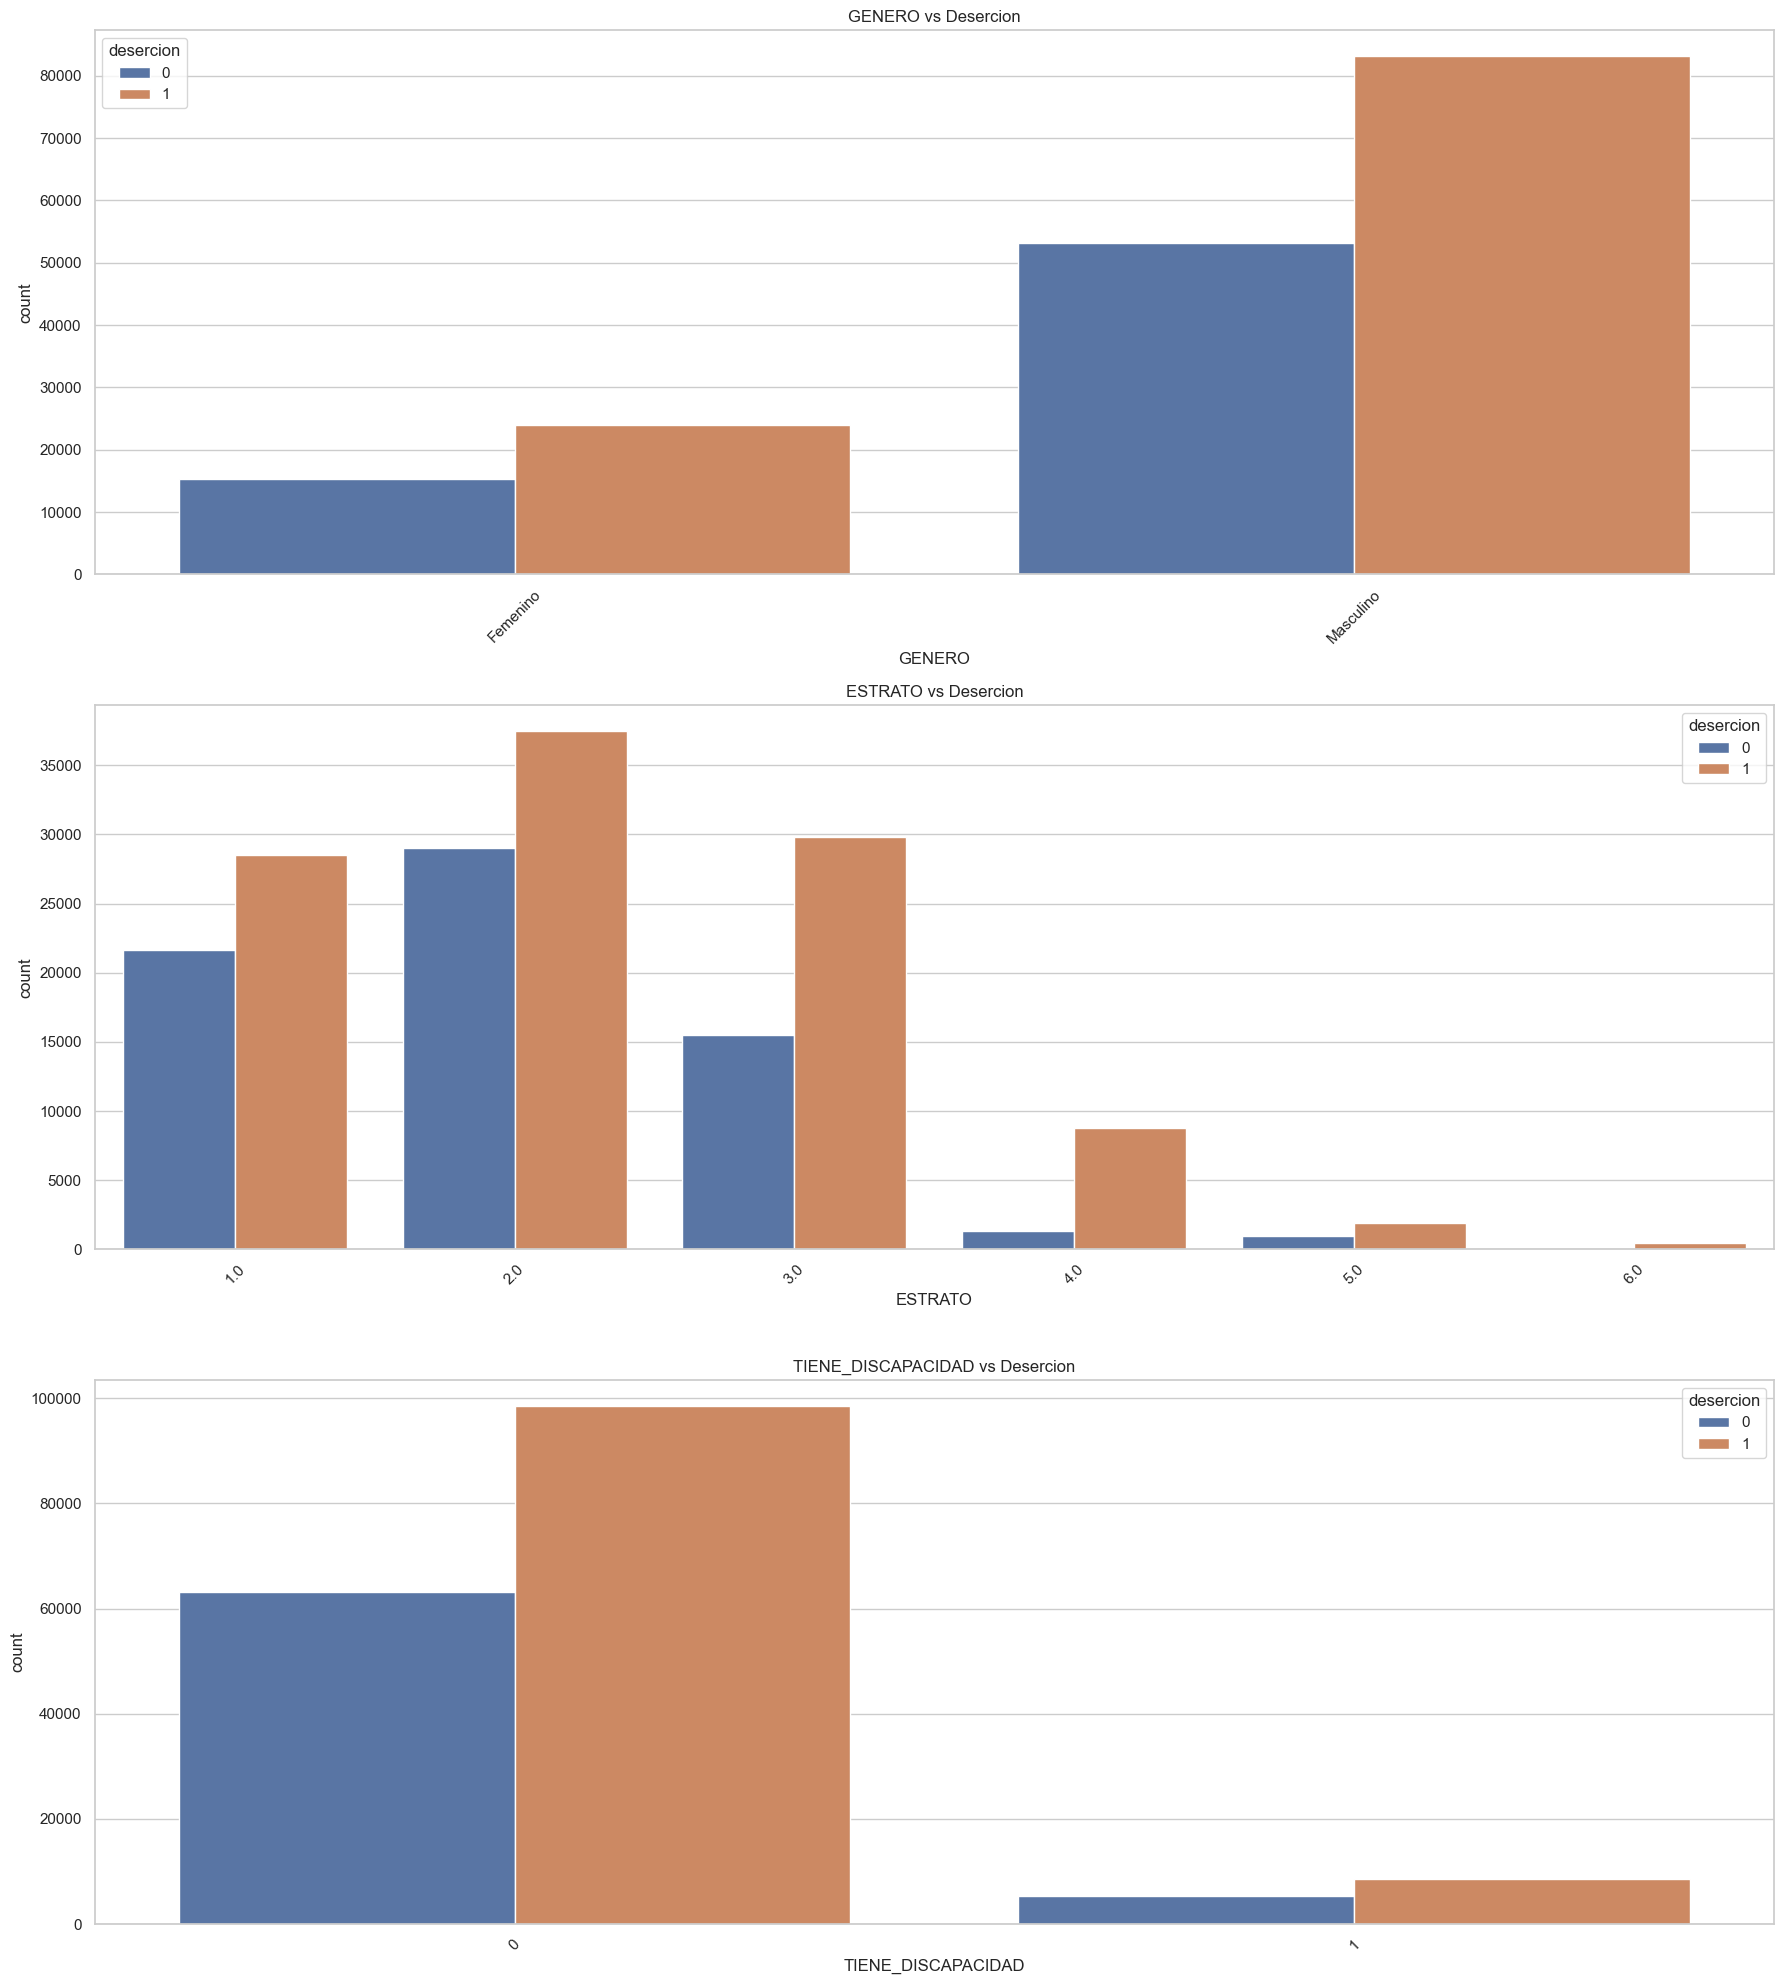

In [72]:
sns.set(style="whitegrid")

categorical_vars = ['GENERO', 'ESTRATO', 'TIENE_DISCAPACIDAD']

plt.figure(figsize=(18, 20)) 

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(len(categorical_vars), 1, i)
    sns.countplot(x=var, hue='desercion', data=df_extracted)
    plt.title(f'{var} vs Desercion')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

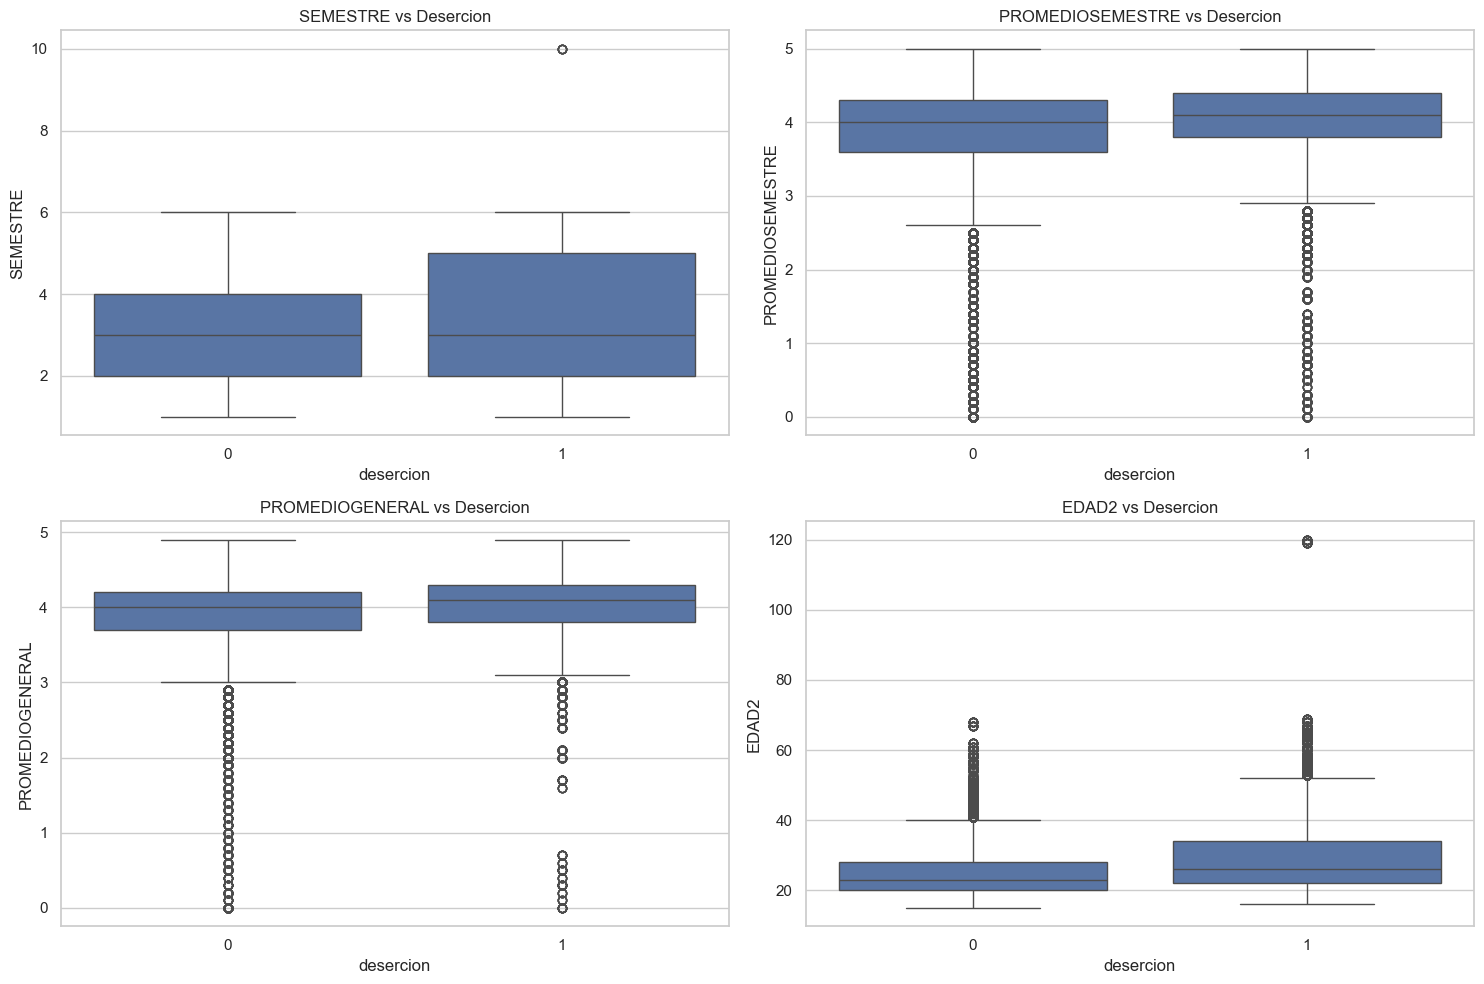

In [44]:
continuous_vars = ['SEMESTRE', 'PROMEDIOSEMESTRE', 'PROMEDIOGENERAL', 'EDAD2']

plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='desercion', y=var, data=df_extracted)
    plt.title(f'{var} vs Desercion')
    plt.tight_layout()

plt.show()

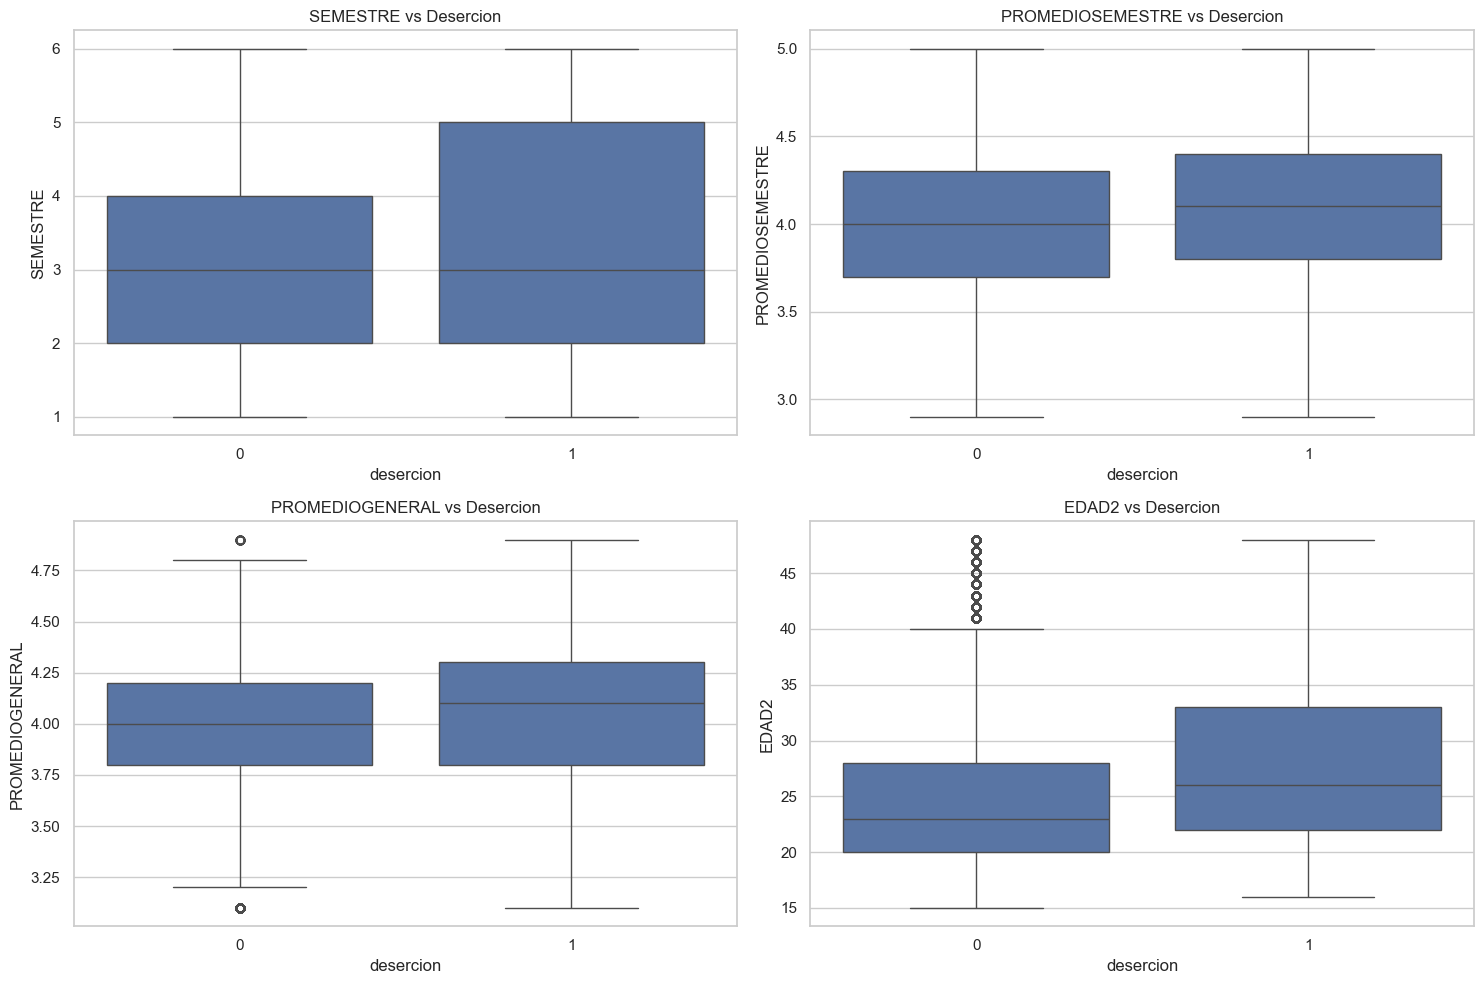

In [73]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for var in continuous_vars:
    df_extracted = remove_outliers(df_extracted, var)

plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='desercion', y=var, data=df_extracted)
    plt.title(f'{var} vs Desercion')
    plt.tight_layout()

plt.show()

In [74]:
df_final[continuous_vars].describe()

,SEMESTRE,PROMEDIOSEMESTRE,PROMEDIOGENERAL,EDAD2
count,175592.000000,175592.000000,175592.000000,175592.000000
mean,3.078905,3.924074,3.978030,27.584913
std,1.719568,0.691148,0.449381,8.646441
min,1.000000,0.000000,0.000000,15.000000
25%,2.000000,3.700000,3.800000,21.000000
50%,3.000000,4.100000,4.000000,25.000000
75%,5.000000,4.300000,4.300000,32.000000
max,10.000000,5.000000,4.900000,120.000000


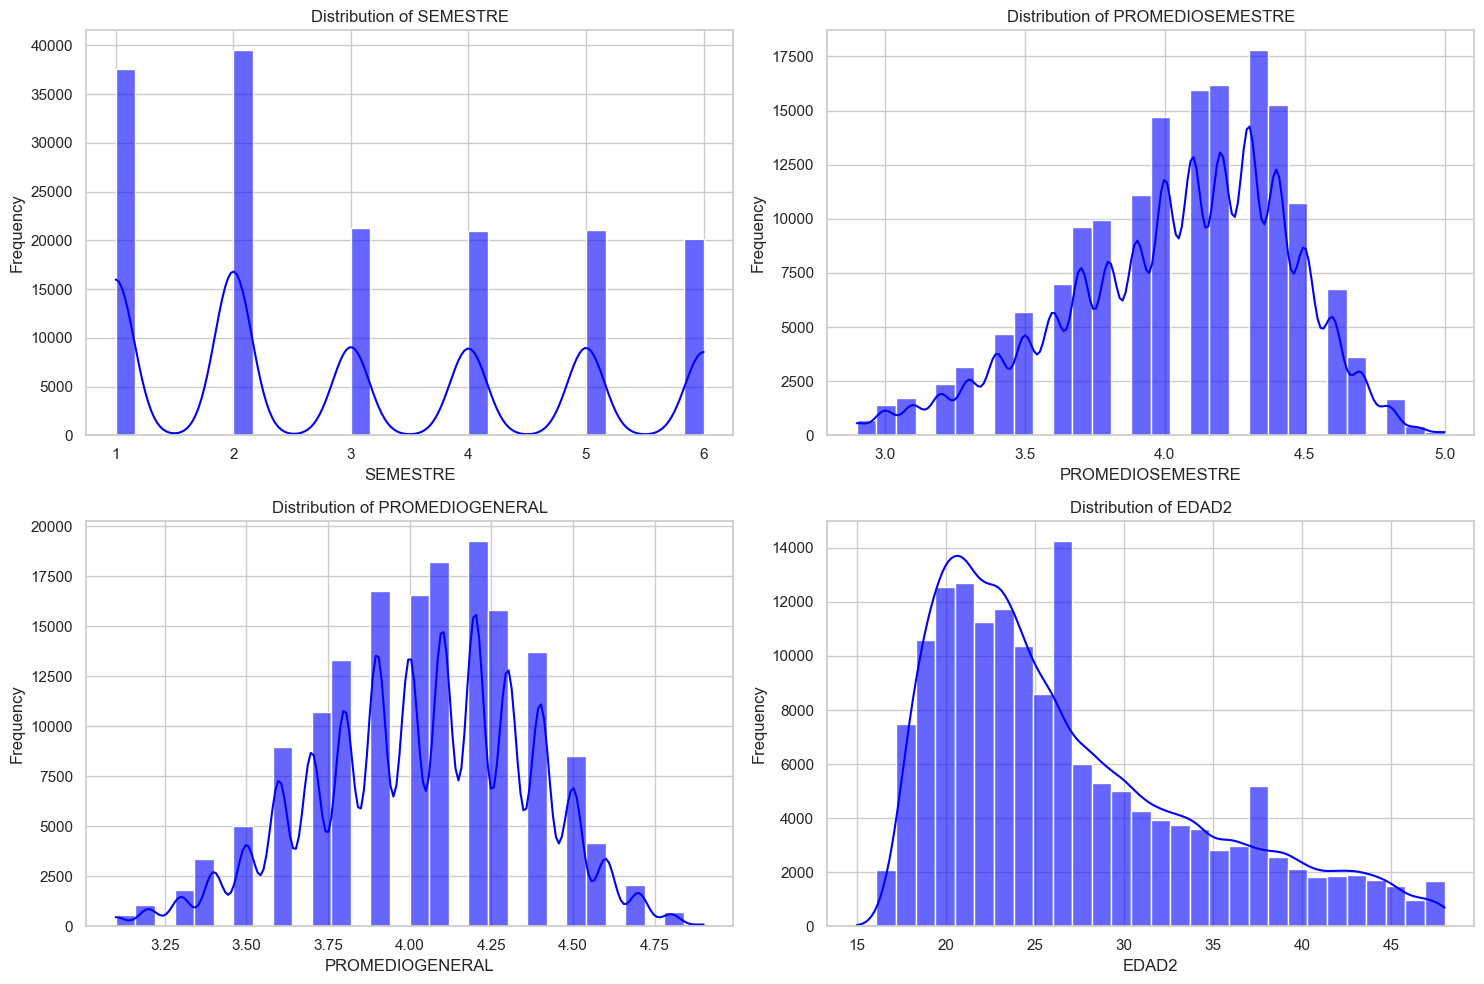

In [75]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_extracted[var], kde=True, bins=30, color='blue', alpha=0.6)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

In [76]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
